In [1]:
#Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True 

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [2]:
"""This lab requests that we import the dataset using the sklearn method for it. 
However, it also says it has added errors to fulfill the purpose of the cleanign challenge. 
So, I have decided using the pandas method instead of the sklearn method, which gives an array
more difficult to explore and visualize and, also, comes without the added errors"""

#from sklearn.datasets import load_iris

'This lab requests that we import the dataset using the sklearn method for it. \nHowever, it also says it has added errors to fulfill the purpose of the cleanign challenge. \nSo, I have decided using the pandas method instead of the sklearn method, which gives an array\nmore difficult to explore and visualize and, also, comes without the added errors'

In [12]:
iris = pd.read_csv("./iris-data.csv")

In [13]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
#It seems there are 5 null values in petal_width_cm
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris[iris["petal_width_cm"].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [16]:
#As they are few and they are all within the setosa type, I am going to replace the null values with the mode.

iris[iris["class"] == "Iris-setosa"]

mode_petal_width_setosa = iris[iris["class"] == "Iris-setosa"]['petal_width_cm'].mode()

mode_petal_width_setosa

0    0.2
Name: petal_width_cm, dtype: float64

In [20]:
iris.loc[iris['petal_width_cm'].isnull(), 'petal_width_cm'] = mode_petal_width_setosa[0]

In [21]:
#Verifico que ya no hay nulos:

iris[iris['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [23]:
#The dataframe still makes sense and I no longer have the null problem.
iris[iris["class"] == "Iris-setosa"]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.2,Iris-setosa


In [35]:
#I have realized, while trying to plot the dataframe, there was some kind of error within the class column.
#Sometimes it's misspelled 
iris["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [39]:
iris.loc[iris["class"]== "Iris-setossa", "class"] = "Iris-setosa"
iris.loc[iris["class"]== "versicolor", "class"] = "Iris-versicolor"

In [40]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

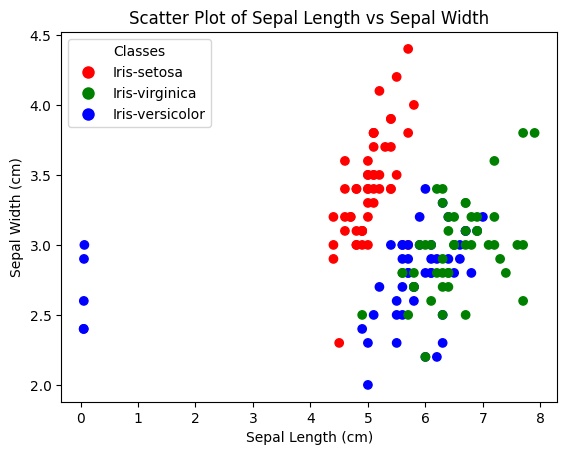

In [41]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}

plt.scatter(iris["sepal_length_cm"], iris["sepal_width_cm"], c=[colors[label] for label in iris["class"]])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

legend_labels = list(colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in legend_labels]
plt.legend(legend_handles, legend_labels, title='Classes')

plt.show()

"""We can see that, with the current features, the iris-setosa is highly recognizable, 
while the versicolor and the virginica overlap each other. I think we would need new features that would allow
us to distinguis between the last two types."""

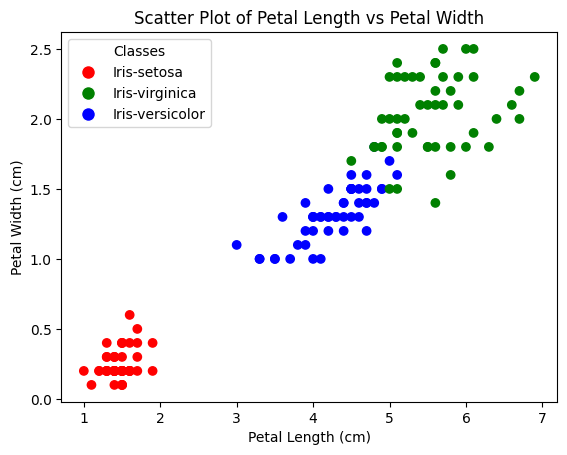

In [42]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}

plt.scatter(iris["petal_length_cm"], iris["petal_width_cm"], c=[colors[label] for label in iris["class"]])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs Petal Width')

legend_labels = list(colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in legend_labels]
plt.legend(legend_handles, legend_labels, title='Classes')

plt.show()

#These features allow us to difference between the three classes much better.

In [43]:
#Saving the modified dataframe:

iris_modified = iris.to_csv("./iris_modified.csv")